# Data Sanity Checks

In [1]:
import networkx as nx
from networkx.algorithms.link_prediction import jaccard_coefficient

import random

import numpy as np
import matplotlib
import matplotlib.pylab as plt
import pickle
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



from concurrent.futures import ProcessPoolExecutor

import copy

In [2]:
# Import normalized data
with open('03-normalized-data/predictors.pkl', 'rb') as f:
    predictors = pickle.load(f)

baseline_p = predictors[5]

predictors = predictors[:5]


# Save data for later use

# Save data 
with open('05-edge-metadata/edge_metadata.pkl', 'rb') as f:
    edge_metadata = pickle.load(f)

# Import edgenonedge data
with open('04-edgenonedge-data/edgenonedge_data.pkl', 'rb') as f:
    edgenonedge_data = pickle.load(f)



predictor_names = ['Jaccard Coefficient', 'Adamic-Adar Index', 'Geodesic Distance',
                   'Common Neighbors', 'Degree Product']



In [39]:
p = 0
g = 0
e = 5
print('Sample edge prediction score:', predictors[p][g][e])

Sample edge prediction score: [0.00641026]


In [41]:
# For now, use only the first graph

g = 0

g1_predictions = []

for predictor in predictors:
    g1_predictions.append(predictor[g])
g1_predictions = np.array(g1_predictions)

print(g1_predictions.shape)  # Check the shape of the resulting array


g_ene = edgenonedge_data[g]


print(g_ene.shape)  # Check the shape of the resulting array


(5, 370972, 1)
(370972, 1)


In [ ]:


# Find the most correct predictor for each edge (column-wise)
most_correct_estimator = []
edge_is_real = g_ene

for i in range(g1_predictions.shape[1]):  # Iterate over each edge (column index)
    if edge_is_real[i]: # If missing edge is an edge in the origional graph
        index = np.argmax(g1_predictions[:, i])  # Find the predictor (row) with the maximum value for the edge
        most_correct_estimator.append(index)
    else:
        index = np.argmin(g1_predictions[:, i])  # Find the predictor (row) with the lowest value for the edge
        most_correct_estimator.append(index)

# Convert the result to a NumPy array
most_correct_estimator = np.array(most_correct_estimator).reshape(-1, 1)



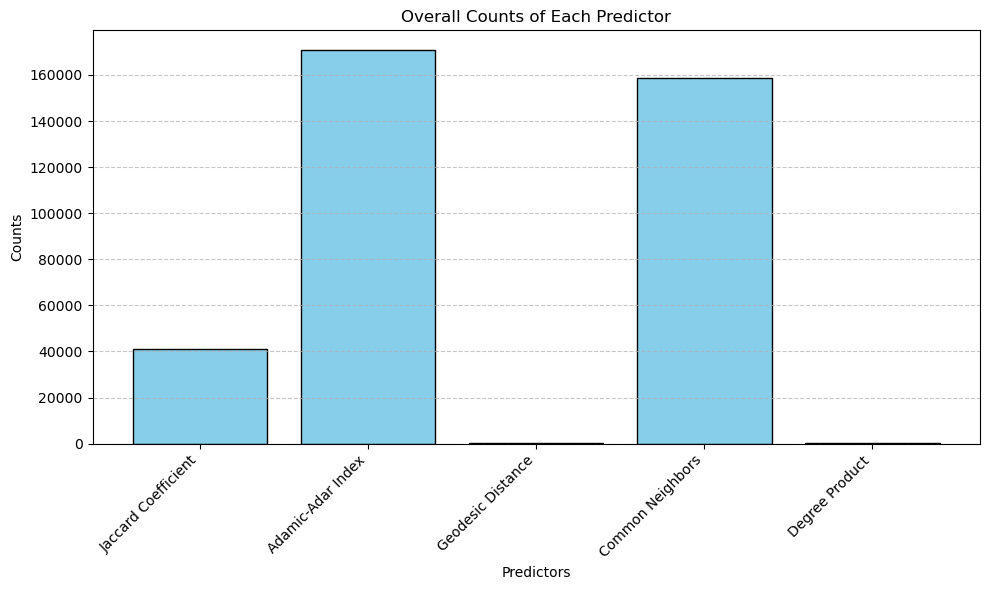

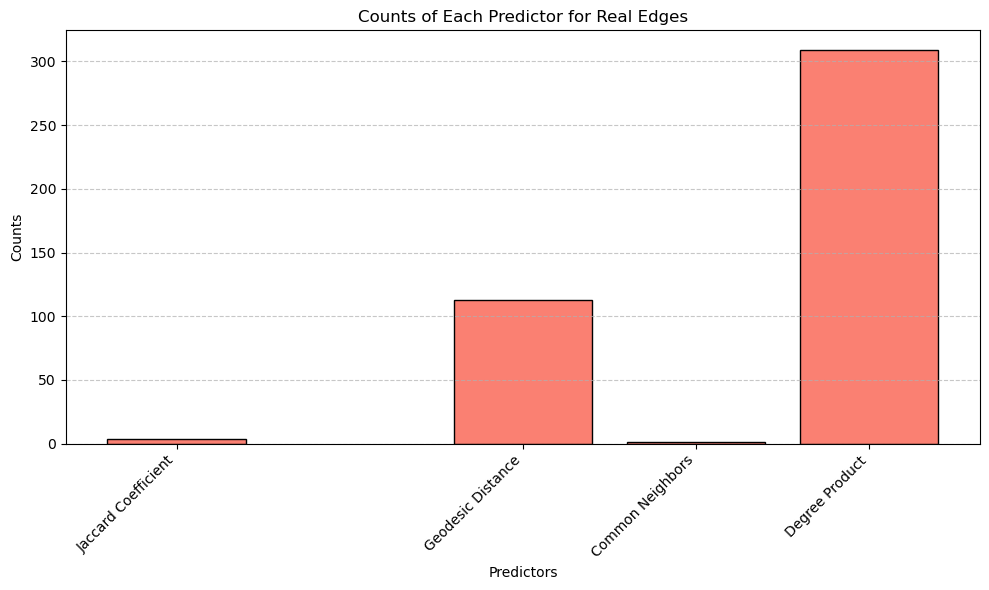

Scores for Random Real Edges
             Jaccard Coefficient  Adamic-Adar Index  Geodesic Distance  \
Edge 181898              0.00000            0.00000            0.25000   
Edge 90499               0.06977            0.15439            0.33333   
Edge 247461              0.00000            0.00000            0.25000   

             Common Neighbors  Degree Product  
Edge 181898           0.00000         0.62237  
Edge 90499            0.39312         0.63812  
Edge 247461           0.00000         0.22703  

Scores for Random Non-Edges
             Jaccard Coefficient  Adamic-Adar Index  Geodesic Distance  \
Edge 68373                   0.0                0.0            0.20000   
Edge 298486                  0.0                0.0            0.16667   
Edge 52482                   0.0                0.0            0.25000   
Edge 115970                  0.0                0.0            0.20000   
Edge 152914                  0.0                0.0            0.25000   
...      

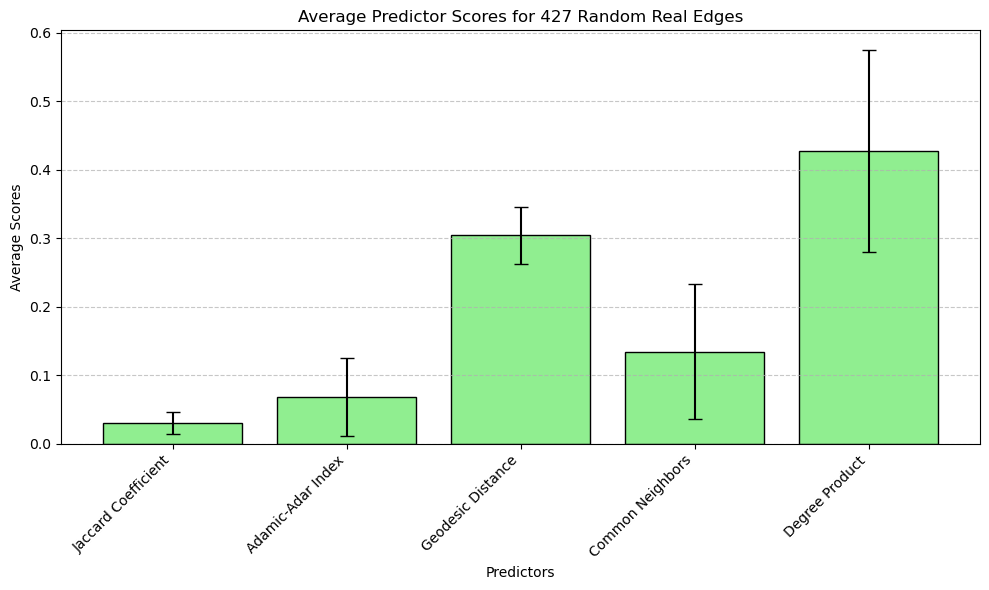

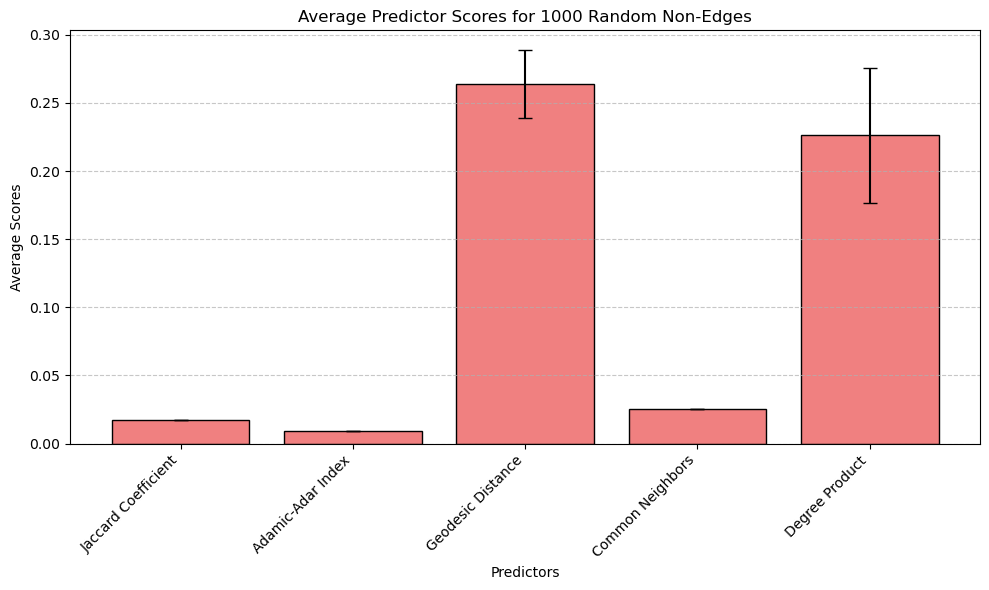

In [43]:
import matplotlib.pyplot as plt
import numpy as np  # Ensure you're importing numpy if using np.unique

real_edge_indices = np.where(edge_is_real)[0]  # Indices where edges actually exist
random_real_indices = random.sample(list(real_edge_indices), min(3, len(real_edge_indices)))  # Randomly pick up to 3 real edges









# Count the occurrences of each predictor
unique_predictors, counts = np.unique(most_correct_estimator, return_counts=True)

# Bar chart for counts of all predictors
plt.figure(figsize=(10, 6))  # Increased width for better spacing
plt.bar(unique_predictors, counts, color='skyblue', edgecolor='black', tick_label=[predictor_names[i] for i in unique_predictors])
plt.title("Overall Counts of Each Predictor")
plt.xlabel("Predictors")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()

# Bar chart for counts of predictors for real edges
plt.figure(figsize=(10, 6))  # Increased width for better spacing
plt.bar(unique_predictors_existing, counts_existing, color='salmon', edgecolor='black', tick_label=[predictor_names[i] for i in unique_predictors_existing])
plt.title("Counts of Each Predictor for Real Edges")
plt.xlabel("Predictors")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()









import pandas as pd

# Create tables for real and non-edges with scores rounded to 5 decimal places
real_edges_table = pd.DataFrame(
    {predictor_names[i]: [round(g1_predictions[i, edge].item(), 5) for edge in random_real_indices] for i in range(len(predictor_names))},
    index=[f"Edge {edge}" for edge in random_real_indices]
)

non_edges_table = pd.DataFrame(
    {predictor_names[i]: [round(g1_predictions[i, edge].item(), 5) for edge in random_non_indices] for i in range(len(predictor_names))},
    index=[f"Edge {edge}" for edge in random_non_indices]
)

# Display tables
print("Scores for Random Real Edges")
print(real_edges_table)

print("\nScores for Random Non-Edges")
print(non_edges_table)









import numpy as np
import matplotlib.pyplot as plt

# Function to calculate IQR
def calculate_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    return q3 - q1


# Select 3 random indices for real edges
real_edge_indices = np.where(edge_is_real)[0]  # Indices where edges actually exist
random_real_indices = random.sample(list(real_edge_indices), min(1000, len(real_edge_indices)))  # Randomly pick up to 3 real edges

# Select 3 random indices for non-edges
non_edge_indices = np.where(~edge_is_real)[0]  # Indices where edges do not exist
random_non_indices = random.sample(list(non_edge_indices), min(1000, len(non_edge_indices)))  # Randomly pick up to 3 non-edges


# Check if there are fewer than 100 edges and adjust sample size
real_sample_size = min(1000, len(random_real_indices))
non_sample_size = min(1000, len(random_non_indices))

# Process for real edges
random_real_indices_sample = np.random.choice(random_real_indices, size=real_sample_size, replace=False)
real_scores = np.array([[g1_predictions[i, edge_idx].item() for edge_idx in random_real_indices_sample] for i in range(len(predictor_names))])

real_means = real_scores.mean(axis=1)  # Average scores
real_iqrs = np.apply_along_axis(calculate_iqr, axis=1, arr=real_scores)  # IQR for each predictor

# Bar chart for real edges
plt.figure(figsize=(10, 6))
plt.bar(predictor_names, real_means, yerr=real_iqrs / 2, color='lightgreen', edgecolor='black', capsize=5)
plt.title(f"Average Predictor Scores for {real_sample_size} Random Real Edges")
plt.xlabel("Predictors")
plt.ylabel("Average Scores")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Process for non-edges
random_non_indices_sample = np.random.choice(random_non_indices, size=non_sample_size, replace=False)
non_scores = np.array([[g1_predictions[i, edge_idx].item() for edge_idx in random_non_indices_sample] for i in range(len(predictor_names))])

non_means = non_scores.mean(axis=1)  # Average scores
non_iqrs = np.apply_along_axis(calculate_iqr, axis=1, arr=non_scores)  # IQR for each predictor

# Bar chart for non-edges
plt.figure(figsize=(10, 6))
plt.bar(predictor_names, non_means, yerr=non_iqrs / 2, color='lightcoral', edgecolor='black', capsize=5)
plt.title(f"Average Predictor Scores for {non_sample_size} Random Non-Edges")
plt.xlabel("Predictors")
plt.ylabel("Average Scores")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
